# Test treatment effects under placebo

The set up for the following tests is to test the regression estimator for the treatment effect in the case that the treatment effect is 0, but the treatment is related to the risk factor affecting the outcome.

## Example B.

One continuous risk factor $X$, one binary treatment $T$, one binary outcome $Y$.
The risk factor for the treated (i.e. placebo) group is distributed according to one distribution, while the risk factor for the control group is distributed according to another distribution.  For simplicity, these distributions only differ by location.

We generate N=100 patients per treatment arm, then estimate the treatment effect.  This is repeated n_iter = 1000 times for the bootstrap 95% confidence interval.

In [78]:
import importlib
importlib.reload(treatment_effect_under_placebo_tests);

In [79]:
from treatment_effect_under_placebo_tests import scenario_B
cis, _ = scenario_B(N = 100,
                 n_iter = 1000,
                 loc = 1.,
                 distribution_type = 'uniform',
                 method = 'regression')
print('Treatment Effect CI: ({:.2f},  {:.2f})'.format(cis[0],cis[1]))

Treatment Effect CI: (-0.41,  1.32)


Now look through multiple location settings, to understand how the discrepancy between distributions affects the treatment effect estimate.

In [80]:
import numpy as np
nlocs = 20
locs = np.linspace(-8,8,nlocs)
cis = np.zeros((nlocs,2))
for i, loc in enumerate(locs):
    cis[i,:], _ = scenario_B(N = 100,
                          n_iter = 1000,
                          loc = loc,
                          distribution_type = 'uniform',
                          method = 'regression')   

Plot the results: treatment effect CIs against the location parameter.

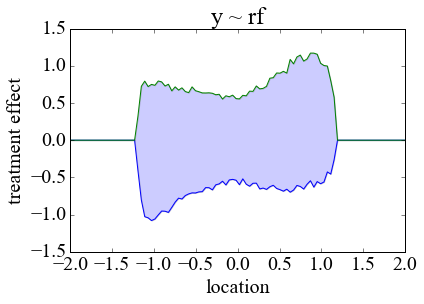

In [86]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'family':'Times New Roman', 'weight':'normal', 'size':20})
import matplotlib.pyplot as plt
plt.figure()
plt.plot(locs,cis[:,0],'-')
plt.plot(locs,cis[:,1],'-')
plt.fill_between(locs,cis[:,0],cis[:,1],alpha=0.2)
plt.title('y ~ rf')
plt.xlabel('location')
plt.ylabel('treatment effect')
plt.show()
# plt.savefig('C:\\Users\\jb2428\\Desktop\\python\\cer\\plt_placebo_scenario_B_uniform')

### Example B. 

Compare the raw regression estimator results to those of matching distance, followed by using the regression estimator.

In [84]:
# Run all methods
methods = ['regression', 'matchdist']
nlocs = 100
locs = np.linspace(-2,2,nlocs)
cis_ = {}
for method in methods:    
    cis = np.zeros((nlocs,2))
    for i, loc in enumerate(locs):        
        cis[i,:], num_valid = scenario_B(N = 100,
                                         n_iter = 1000,
                                         loc = loc,
                                         distribution_type = 'uniform',
                                         method = method)        
        # print('Method {}, Location {}, TE CI: ({:.2f},  {:.2f}); {} valid runs.'.format(method,loc,cis[0],cis[1],num_valid))
    cis_[method] = cis

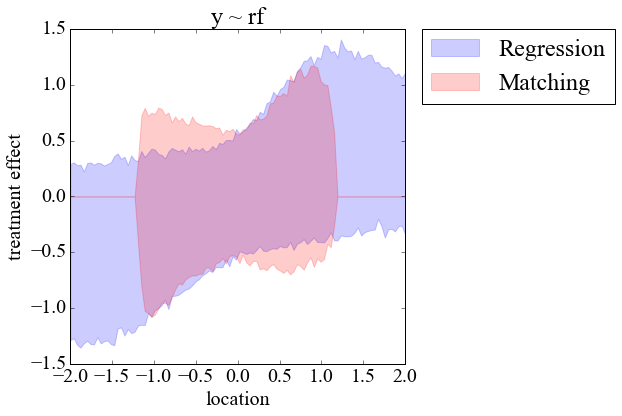

In [96]:
fig = plt.figure()    
fig.set_size_inches(6,6)  
ax = fig.add_subplot(111) 
plt.fill_between(locs,cis_['regression'][:,0],cis_['regression'][:,1],alpha=0.2,color='blue',label='Regression')
plt.fill_between(locs,cis_['matchdist'][:,0],cis_['matchdist'][:,1],alpha=0.2,color='red',label='Matching')
plt.title('y ~ rf')
plt.xlabel('location')
plt.ylabel('treatment effect')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0., numpoints=3)
# plt.show()
fname = 'C:\\Users\\jb2428\\Desktop\\python\\cer\\plt_placebo_scenario_B_uniform.png' 
plt.savefig(fname,format='png',dpi=600,bbox_inches='tight') 